In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

   dmf  flor
0  223  2.10
1  232  2.80
2  269  1.99
3  261  1.46
4  254  1.33
               dmf         flor
count  2481.000000  2481.000000
mean    502.505844     0.903926
std     212.438245     0.742189
min     181.000000     0.000000
25%     289.000000     0.270000
50%     457.000000     0.640000
75%     707.000000     1.380000
max     860.000000     2.930000


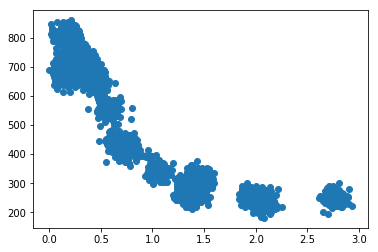

In [2]:
df = pd.read_csv('dmf.csv')
print(df.head())
df.describe(include='all')
print(df.describe(include='all'))
plt.scatter(df.flor,df.dmf)


# Part - A

In [3]:
trainX,trainY = df.flor[0:1000],df.dmf[0:1000]
testX,testY = df.flor[1000:],df.dmf[1000:]

model = sm.OLS(trainY,trainX).fit()
pred = model.predict(testX).tolist()



print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    dmf   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.3
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           2.41e-62
Time:                        10:39:26   Log-Likelihood:                -7582.4
No. Observations:                1000   AIC:                         1.517e+04
Df Residuals:                     999   BIC:                         1.517e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
flor         229.9055     12.846     17.896      0.0

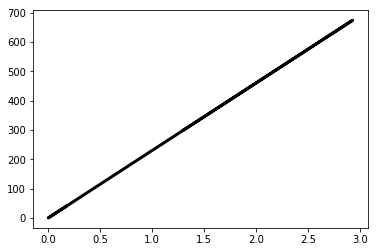

In [4]:
plt.plot(testX,pred, color='black', linewidth=3)

In [5]:
d = {'Real_Value':testY,'Predicted_Value':pred,'Error':np.subtract(testY,pred)}
Pred = pd.DataFrame(data=d)
print(Pred.head(20))

      Real_Value  Predicted_Value       Error
1000         316       298.877140   17.122860
1001         329       333.362964   -4.362964
1002         364       252.896041  111.103959
1003         375       193.120613  181.879387
1004         453       142.541405  310.458595
1005         572       119.550856  452.449144
1006         651       101.158417  549.841583
1007         613        29.887714  583.112286
1008         704        75.868812  628.131188
1009         704        57.476373  646.523627
1010         738        48.280153  689.719847
1011         735        73.569757  661.430243
1012         807        41.382989  765.617011
1013         817        39.083934  777.916066
1014         818        66.672593  751.327407
1015         199       464.409094 -265.409094
1016         252       625.342939 -373.342939
1017         239       429.923270 -190.923270
1018         246       314.970524  -68.970524
1019         248       312.671469  -64.671469


# Plot the preddicted value VS error

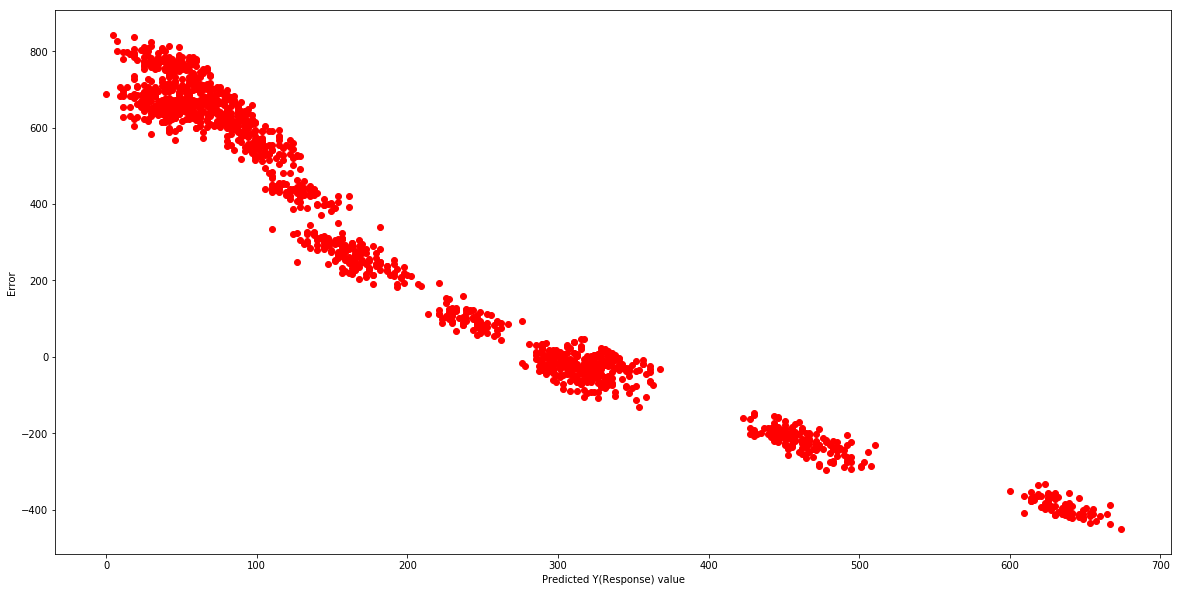

In [6]:


plt.figure(figsize=(20,10))
plt.scatter(Pred.Predicted_Value,Pred.Error,color='red',linewidths=1)
plt.xlabel("Predicted Y(Response) value")
plt.ylabel("Error")
plt.show()



# Plot the preddicted value VS real value

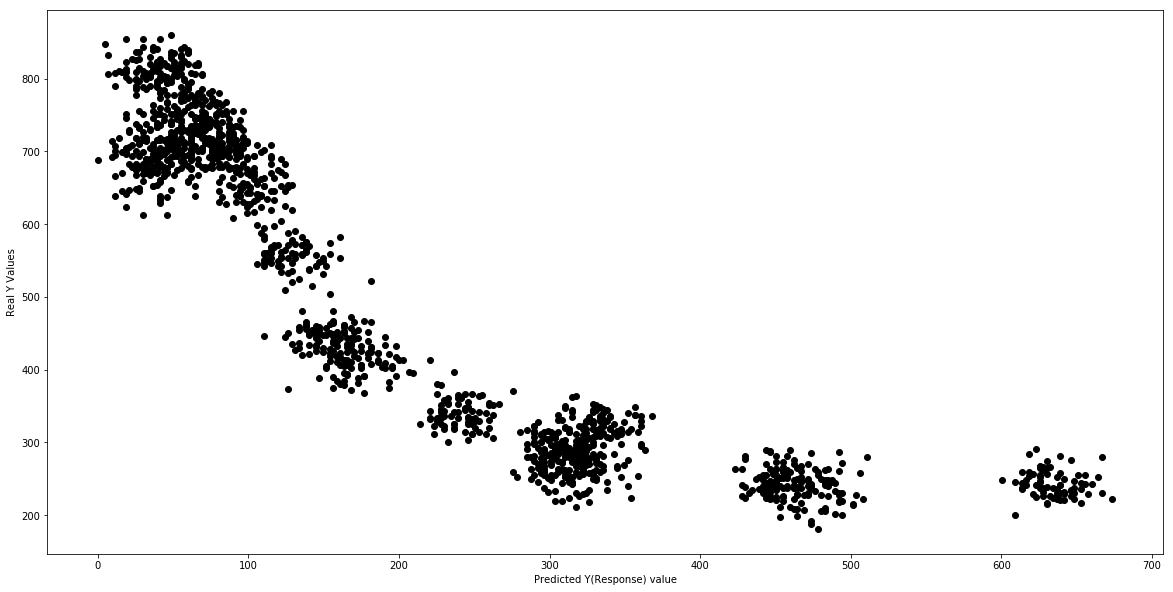

In [7]:

plt.figure(figsize=(20,10))
plt.scatter(Pred.Predicted_Value,Pred.Real_Value,color='black',linewidths=1)
plt.xlabel("Predicted Y(Response) value")
plt.ylabel("Real Y Values")
plt.show()

# Gaussian Plot

(array([283.,  95.,  79., 164.,  71.,  92.,  57.,  57., 147., 257., 115.,
         64.]),
 array([2.00250300e-02, 7.02185138e+01, 1.40417003e+02, 2.10615491e+02,
        2.80813980e+02, 3.51012469e+02, 4.21210958e+02, 4.91409446e+02,
        5.61607935e+02, 6.31806424e+02, 7.02004913e+02, 7.72203401e+02,
        8.42401890e+02]),
 <a list of 12 Patch objects>)

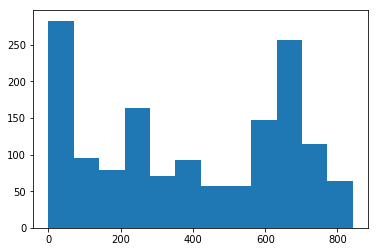

In [8]:
plt.hist(np.absolute(Pred.Error),bins='auto')

# part - B

In [9]:
df = pd.read_csv('dmf.csv')

df['flor2'] = [ pow(df.flor[i],2) for i in range(len(df)) ]

print(df)

trainX,trainY = df[['flor','flor2']][0:1000],df.dmf[0:1000]
testX,testY = df[['flor','flor2']][1000:],df.dmf[1000:]

model = sm.OLS(trainY,trainX).fit()
pred = model.predict(testX).tolist()


print(model.summary())


      dmf  flor   flor2
0     223  2.10  4.4100
1     232  2.80  7.8400
2     269  1.99  3.9601
3     261  1.46  2.1316
4     254  1.33  1.7689
5     320  1.30  1.6900
6     287  1.40  1.9600
7     330  1.18  1.3924
8     405  0.64  0.4096
9     451  0.59  0.3481
10    560  0.50  0.2500
11    639  0.46  0.2116
12    665  0.11  0.0121
13    713  0.31  0.0961
14    702  0.25  0.0625
15    684  0.26  0.0676
16    719  0.39  0.1521
17    780  0.27  0.0729
18    827  0.17  0.0289
19    832  0.25  0.0625
20    247  2.16  4.6656
21    239  2.75  7.5625
22    255  1.92  3.6864
23    217  1.32  1.7424
24    262  1.48  2.1904
25    310  1.31  1.7161
26    336  1.14  1.2996
27    404  0.77  0.5929
28    438  0.65  0.4225
29    537  0.66  0.4356
...   ...   ...     ...
2451  460  0.60  0.3600
2452  584  0.48  0.2304
2453  702  0.48  0.2304
2454  678  0.16  0.0256
2455  679  0.35  0.1225
2456  717  0.20  0.0400
2457  730  0.09  0.0081
2458  715  0.40  0.1600
2459  768  0.34  0.1156
2460  799  0.25 

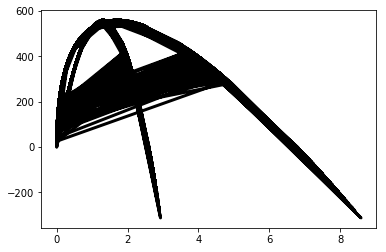

In [10]:
plt.plot(testX,pred, color='black', linewidth=3)

In [11]:
d = {'Real_Value':testY,'Predicted_Value':pred,'Error':np.subtract(testY,pred)}
Pred = pd.DataFrame(data=d)
print(Pred.head(20))

      Real_Value  Predicted_Value       Error
1000         316       558.569695 -242.569695
1001         329       551.462188 -222.462188
1002         364       545.016256 -181.016256
1003         375       488.048190 -113.048190
1004         453       405.101869   47.898131
1005         572       356.870943  215.129057
1006         651       313.548579  337.451421
1007         613       105.898119  507.101881
1008         704       247.104193  456.895807
1009         704       193.780179  510.219821
1010         738       165.538964  572.461036
1011         735       240.668993  494.331007
1012         807       143.667150  663.332850
1013         817       136.244944  680.755056
1014         818       220.968589  597.031411
1015         199       389.431388 -190.431388
1016         252      -102.036263  354.036263
1017         239       452.798175 -213.798175
1018         246       557.095267 -311.095267
1019         248       557.503301 -309.503301
